In [12]:
library('igraph')
library('Matrix')
library('pracma')

In [18]:
create_transition_matrix = function (g){
    
    # WARNING: make sure your graph is connected (you might input GCC of your graph)
    
    vs = V(g)
    n = vcount(g)
    adj = as_adjacency_matrix(g)
    adj[diag(rowSums(adj) == 0)] = 1  # handle if the user is using the function for networks with isolated nodes by creating self-edges
    z = matrix(rowSums(adj, , 1))
    
    transition_matrix = adj / repmat(z, 1, n)  # normalize to get probabilities
    
    return(transition_matrix)
}
    
random_walk = function (g, num_steps, start_node, tele_prob = 0, transition_matrix = NULL){
    if(is.null(transition_matrix))
        transition_matrix = create_transition_matrix(g)
        
    vert = seq_len(0)
    v = start_node
    vert = c(vert, v)
    for(i in 1:num_steps){
#       fprintf('Step %d: %d\n', i, v)  # COMMENT THIS
        jump = sample(c(0, 1), 1, prob = c(1 - tele_prob, tele_prob))
        PMF = NULL
        if (jump == 0) {
            PMF = transition_matrix[v, ]
        }
        v = sample(1:vcount(g), 1, prob = PMF) 
        vert = c(vert, v)
    }
    
    return(vert)
}

freq = function (vertex_sequence, num_vertex, num_steps) {
    name = names(table(vertex_sequence))
    count = as.numeric(table(vertex_sequence))
    result = seq_len(0)
    for (i in 1:num_vertex){
        if(i %in% name){
            result = c(result, count[i]/(num_steps + 1))
        }
        else
            result = c(result, 0)
    }
    result[is.na(result)] = 0
    return(result)
}

### 3. PageRank 
#### (a)
Generate the network and simulate random walk on the network. Measure the visit probability of each node and calculate the the relationship between the visit probabilty and the degree distribution. The results are as below. And we can see that the visit probability is highly related to the in-degree of the nodes.

Correlation between in-degree and visit probability:  0.532488 
Correlation between out-degree and visit probability:  -0.7304185 
Correlation between total-degree and visit probability:  0.5299272 


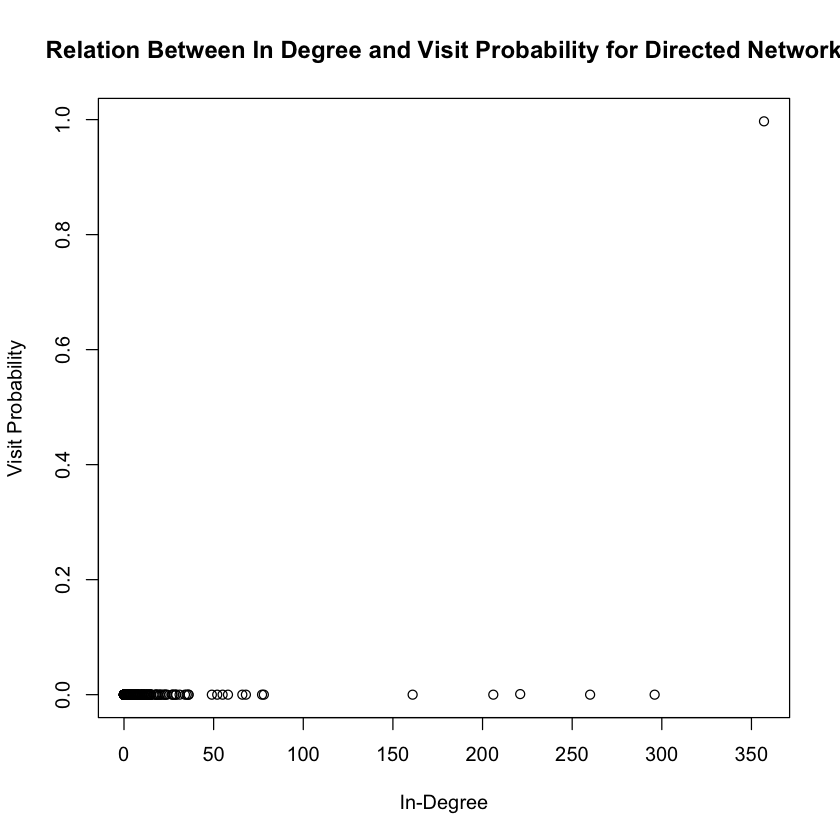

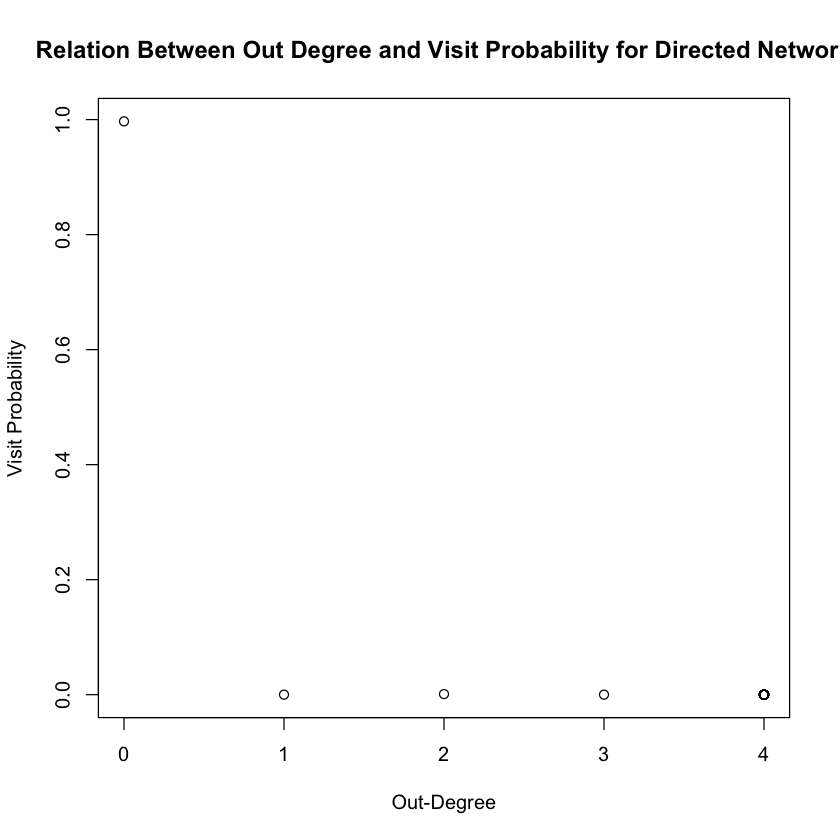

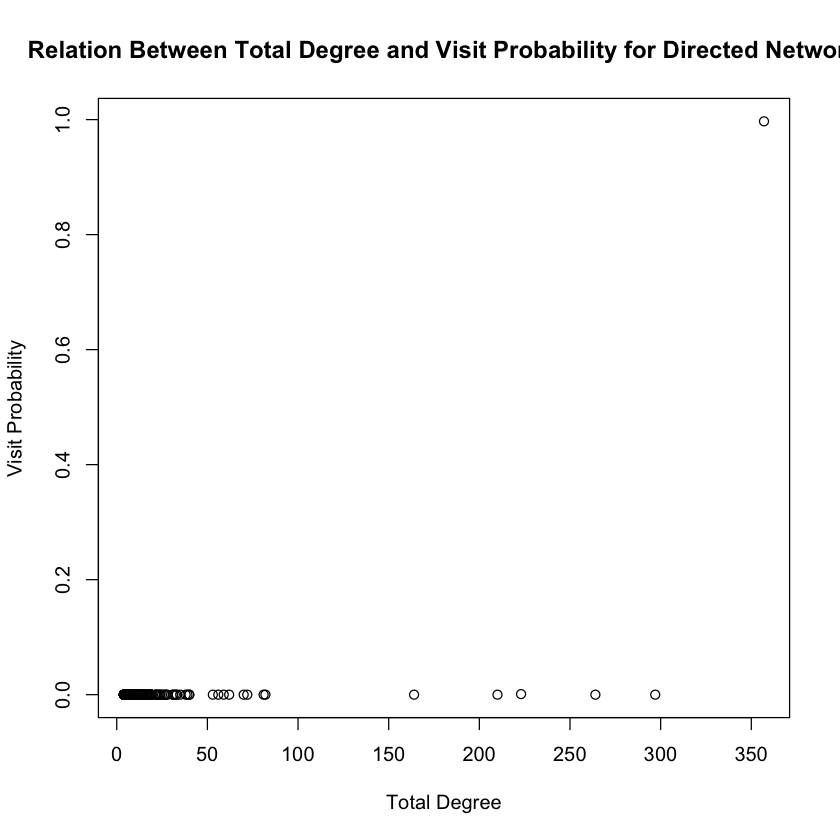

In [24]:
random_network = barabasi.game(1000, m = 4, directed = TRUE)
set.seed(1)
start_node = sample(1:vcount(random_network), 1)
vertex_sequence = random_walk(random_network, 1000, start_node)
visit_probability = freq(vertex_sequence, 1000, 1000)

network_degree = degree(random_network)
network_in_degree = degree(random_network, mode = "in")
network_out_degree = degree(random_network, mode = "out")

in_relationship = cor(network_in_degree, visit_probability)
cat("Correlation between in-degree and visit probability: ", in_relationship, "\n")

out_relationship = cor(network_out_degree, visit_probability)
cat("Correlation between out-degree and visit probability: ", out_relationship, "\n")

relationship = cor(network_degree, visit_probability)
cat("Correlation between total-degree and visit probability: ", relationship, "\n")

plot_data = rbind(network_in_degree, visit_probability)
plot_data = plot_data[,order(plot_data[1,])]  #order by degree
plot(plot_data[1,], plot_data[2,], xlab = "In-Degree", ylab = "Visit Probability", main = "Relation Between In Degree and Visit Probability for Directed Network")

plot_data = rbind(network_out_degree, visit_probability)
plot_data = plot_data[,order(plot_data[1,])]  #order by degree
plot(plot_data[1,], plot_data[2,], xlab = "Out-Degree", ylab = "Visit Probability", main = "Relation Between Out Degree and Visit Probability for Directed Network")

plot_data = rbind(network_degree, visit_probability)
plot_data = plot_data[,order(plot_data[1,])]  #order by degree
plot(plot_data[1,], plot_data[2,], xlab = "Total Degree", ylab = "Visit Probability", main = "Relation Between Total Degree and Visit Probability for Directed Network")

#### (b)
Perform random walk with a teleportation probability of 0.15. The result visit probability is more distributed than the one shown in 3(a), though it's still highly related to the in-degree of the nodes.

Correlation between in-degree and visit probability:  0.6149209 
Correlation between out-degree and visit probability:  -0.7949347 
Correlation between total-degree and visit probability:  0.6123663 


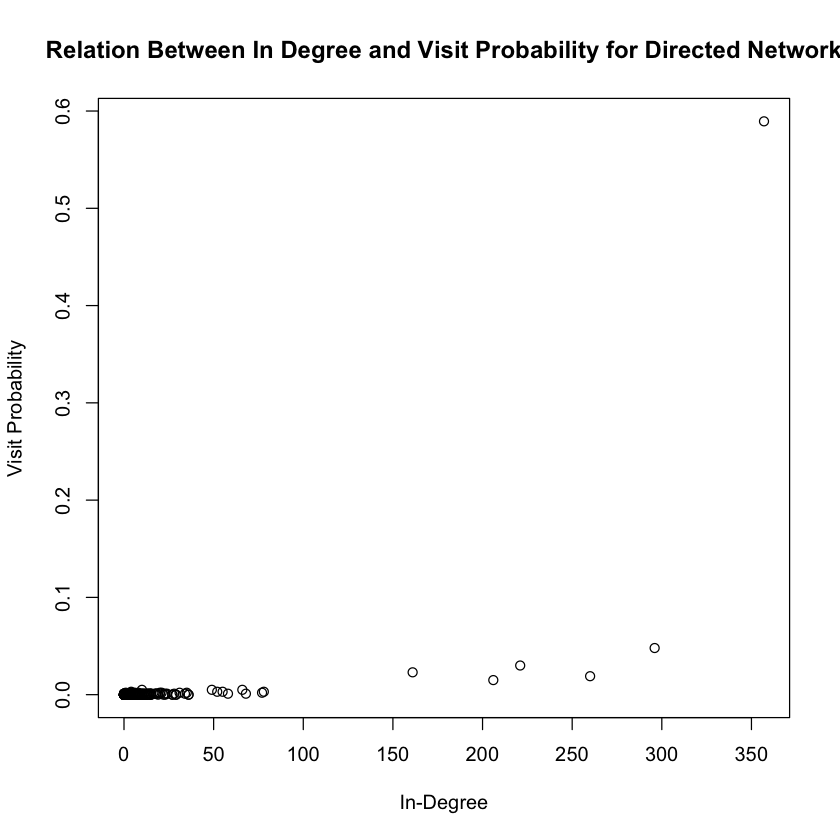

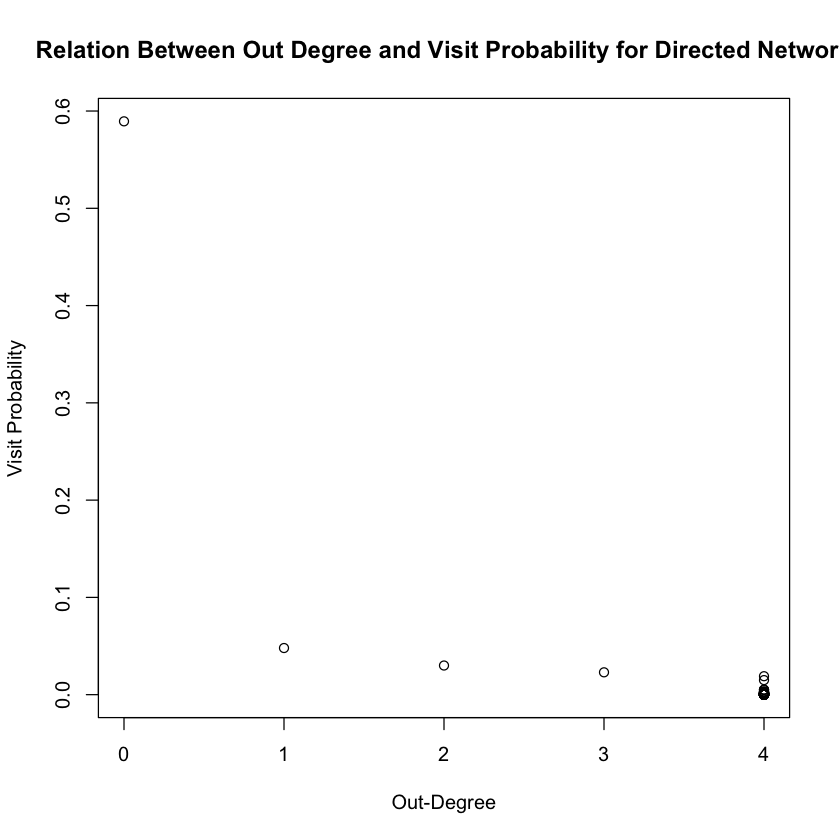

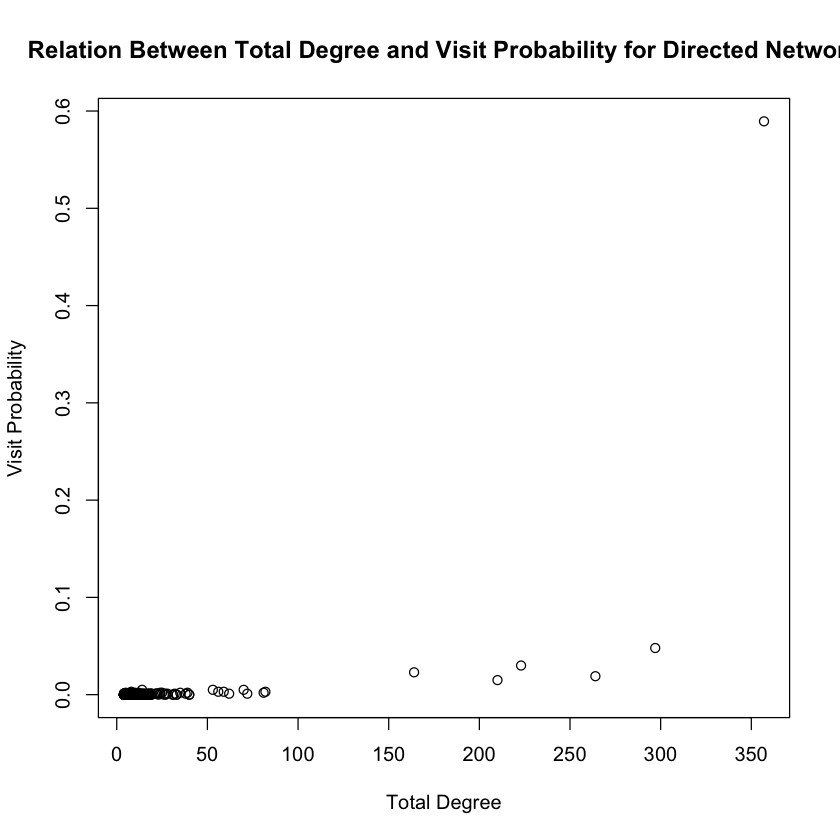

In [25]:
random_network = barabasi.game(1000, m = 4, directed = TRUE)
set.seed(1)
start_node = sample(1:vcount(random_network), 1)
vertex_sequence = random_walk(random_network, 1000, start_node, tele_prob = 0.15)
visit_probability = freq(vertex_sequence, 1000, 1000)

network_degree = degree(random_network)
network_in_degree = degree(random_network, mode = "in")
network_out_degree = degree(random_network, mode = "out")

in_relationship = cor(network_in_degree, visit_probability)
cat("Correlation between in-degree and visit probability: ", in_relationship, "\n")

out_relationship = cor(network_out_degree, visit_probability)
cat("Correlation between out-degree and visit probability: ", out_relationship, "\n")

relationship = cor(network_degree, visit_probability)
cat("Correlation between total-degree and visit probability: ", relationship, "\n")

plot_data = rbind(network_in_degree, visit_probability)
plot_data = plot_data[,order(plot_data[1,])]  #order by degree
plot(plot_data[1,], plot_data[2,], xlab = "In-Degree", ylab = "Visit Probability", main = "Relation Between In Degree and Visit Probability for Directed Network")

plot_data = rbind(network_out_degree, visit_probability)
plot_data = plot_data[,order(plot_data[1,])]  #order by degree
plot(plot_data[1,], plot_data[2,], xlab = "Out-Degree", ylab = "Visit Probability", main = "Relation Between Out Degree and Visit Probability for Directed Network")

plot_data = rbind(network_degree, visit_probability)
plot_data = plot_data[,order(plot_data[1,])]  #order by degree
plot(plot_data[1,], plot_data[2,], xlab = "Total Degree", ylab = "Visit Probability", main = "Relation Between Total Degree and Visit Probability for Directed Network")